In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [19]:
df = pd.read_csv('data/Car_Purchasing_Data.csv',encoding='ISO-8859-1')

In [8]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [13]:
# 연봉이 가장 적은 사람의 데이터를 확인

In [23]:
df.loc[df['Annual Salary']==df['Annual Salary'].min(),]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
89,Ferdinand Weber,metus.Vivamus@vitaeposuere.org,Suriname,1,32.094081,20000.0,14261.80773,579181.6552,12895.71468


In [ ]:
# 연봉이 가장 높은 사람의 데이터를 확인

In [24]:
df.loc[df['Annual Salary']==df['Annual Salary'].max(),]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


In [29]:
df['Country'].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: Country, Length: 211, dtype: int64

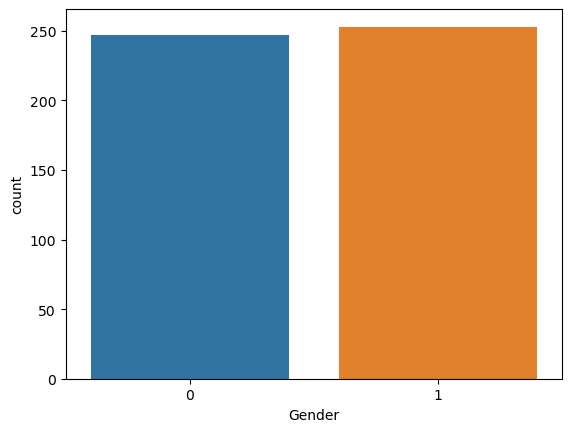

In [33]:
# 남자는 몇명이고 여자는 몇명인지 확인
sb.countplot(data=df,x='Gender')
plt.show()

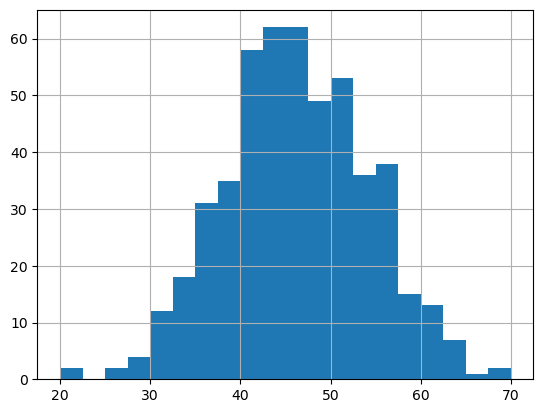

In [38]:
df['Age'].hist(bins=20)
plt.show()

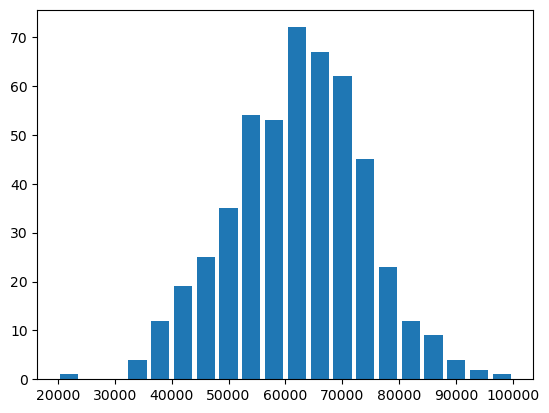

In [42]:
plt.hist(data=df,x='Annual Salary',rwidth=0.8,bins=20)
plt.show()

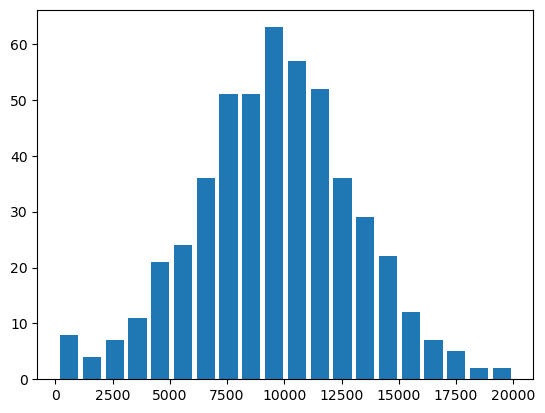

In [44]:
plt.hist(data=df,x='Credit Card Debt',rwidth=0.8,bins=20)
plt.show()

In [45]:
df.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


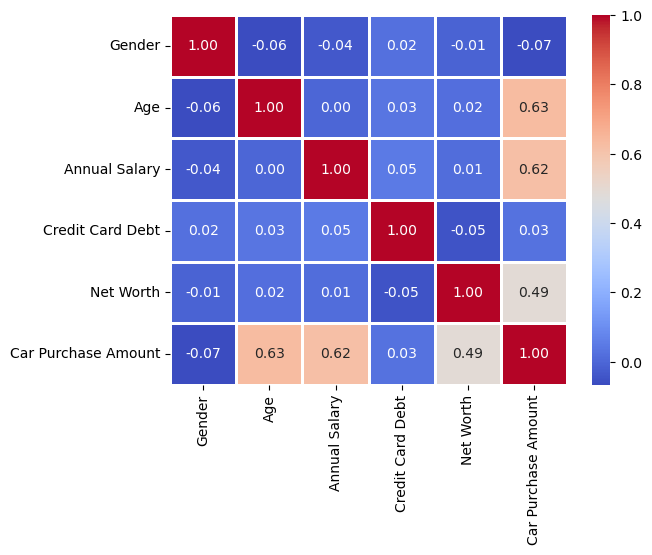

In [48]:
sb.heatmap(data=df.corr(),
cmap='coolwarm', ## 차트의 색상 설정
annot=True, ## 각 셀의 값을 표시할지 결정하는 것
fmt='.2f', ## 소수점 1번째 자리까지 표시하라.
linewidths=0.8) ## 각 셀간의 간격을 0.8로 설정하라.
plt.show() ## 메모리상태는 보여주지말고 차트, 히트맵만 보여줘라.)

In [ ]:
# 자동차 구매 금액을 예측하는 인공지능을 만들어보고싶다.

In [52]:
df.head(3)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921


In [ ]:
# 결측치 확인

In [49]:
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [50]:
# X와 y로 분리

In [84]:
y=df['Car Purchase Amount']

In [85]:
X= df.loc[:,'Gender':'Net Worth']

In [86]:
X = X.values

In [55]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [57]:
from sklearn.linear_model import LinearRegression

In [88]:
regressor=LinearRegression()

In [89]:
regressor.fit(X_train,y_train)

LinearRegression()

In [90]:
regressor.coef_

array([-3.89904806e-02,  8.41561718e+02,  5.62330080e-01, -1.10711400e-05,
        2.89838114e-02])

In [91]:
regressor.intercept_

-42147.11799428924

In [92]:
y_pred=regressor.predict(X_test)

In [93]:
error = y_test - y_pred

In [94]:
#MSE
( error ** 2 ).mean()

1.916197949954419

In [95]:
import joblib

In [96]:
joblib.dump(regressor,'regressor.pkl')

['regressor.pkl']

In [97]:
# 신규 데이터 예측해보자.

In [99]:
# 성별은 여자이고, 나이는 50이며, 연봉은 4만달러, 카드빚 5만달러,
# 자산은 20만달러이면 이 사람은 얼마짜리 차를 구매할 것인가?

In [100]:
new_data=np.array([0,50,40000,50000,200000])

In [101]:
new_data=new_data.reshape(1,5)

In [102]:
regressor.predict(new_data)

array([28220.37986229])